<a href="https://colab.research.google.com/github/ParthDave111/Quant-and-Finance-File/blob/main/simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install simpy

In [2]:
import simpy

In [3]:
# Define environment parameters
environment_size = 100

In [4]:
# Define agent classes
class Prey(object):
  def __init__(self, env, position):
    self.env = env
    self.position = position
    self.alive = True

In [5]:


  def move(self):
    # Simulate random movement within the environment
    new_position = (self.position + simpy.rand() * 10) % environment_size
    self.position = new_position
    yield self.env.timeout(1)  # Move every 1 time unit


In [6]:

  def move(self):
    # Simulate random movement within the environment
    new_position = (self.position + simpy.rand() * 10) % environment_size
    self.position = new_position
    yield self.env.timeout(1)  # Move every 1 time unit

In [7]:
import random

In [41]:
import simpy

def borrower(env, name, principal, interest, duration):
    """
    Simulates a borrower's mortgage payment behavior.

    Args:
        env (simpy.Environment): The simulation environment.
        name (str): Borrower's name (for identification).
        principal (float): The initial loan amount.
        interest (float): Annual interest rate.
        duration (int): Loan duration in months.
    """
    monthly_payment = principal * (interest * (1 + interest) ** duration) / ((1 + interest) ** duration - 1)
    for i in range(duration):
        yield env.timeout(1)  # Simulate one month passing
        # Check for default condition (replace with your desired logic)
        if i > 0 and random.random() < 0.05:  # Default probability of 5% after first month
            print(f"{name} defaults on loan payment after {i} months.")
            break

        # Make monthly payment (assuming successful payment)
        # ...

env = simpy.Environment()
# Set simulation parameters (replace with your desired values)
num_borrowers = 100
principal = 100000
interest = 0.05  # Annual interest rate (5%)
duration = 360  # Loan duration in months (30 years)

# Create borrowers
for i in range(num_borrowers):
    env.process(borrower(env, f"Borrower-{i+1}", principal, interest, duration))

# Start the simulation
env.run()

# Analyze results (e.g., count number of defaults)
# ...


Borrower-2 defaults on loan payment after 1 months.
Borrower-7 defaults on loan payment after 1 months.
Borrower-24 defaults on loan payment after 1 months.
Borrower-35 defaults on loan payment after 1 months.
Borrower-70 defaults on loan payment after 1 months.
Borrower-82 defaults on loan payment after 1 months.
Borrower-29 defaults on loan payment after 2 months.
Borrower-71 defaults on loan payment after 2 months.
Borrower-86 defaults on loan payment after 2 months.
Borrower-88 defaults on loan payment after 2 months.
Borrower-46 defaults on loan payment after 3 months.
Borrower-51 defaults on loan payment after 3 months.
Borrower-55 defaults on loan payment after 3 months.
Borrower-62 defaults on loan payment after 3 months.
Borrower-81 defaults on loan payment after 3 months.
Borrower-17 defaults on loan payment after 4 months.
Borrower-21 defaults on loan payment after 4 months.
Borrower-84 defaults on loan payment after 4 months.
Borrower-98 defaults on loan payment after 4 mon

In [44]:
import simpy
import random

def borrower(env, name, principal, interest, duration):
    """
    Simulates a borrower's mortgage payment behavior.

    Args:
        env (simpy.Environment): The simulation environment.
        name (str): Borrower's name (for identification).
        principal (float): The initial loan amount.
        interest (float): Annual interest rate.
        duration (int): Loan duration in months.
    """
    monthly_payment = principal * (interest * (1 + interest) ** duration) / ((1 + interest) ** duration - 1)
    for i in range(duration):
        yield env.timeout(1)  # Simulate one month passing

        # Check for default condition (replace with your desired logic)
        if i > 0 and random.random() < 0.05:  # Default probability of 5% after first month
            print(f"{name} defaults on loan payment after {i} months.")
            # Track defaulter by month
            global defaults_by_month
            defaults_by_month[i] += 1
            break

        # Make monthly payment (assuming successful payment)
        # ...

env = simpy.Environment()

# Set simulation parameters (replace with your desired values)
num_borrowers = 100
principal = 100000
interest = 0.05  # Annual interest rate (5%)
duration = 360  # Loan duration in months (30 years)

# Initialize a dictionary to store defaults by month
defaults_by_month = {month: 0 for month in range(duration)}  # Initialize with 0 defaults for each month

# Create borrowers
for i in range(num_borrowers):
    env.process(borrower(env, f"Borrower-{i+1}", principal, interest, duration))

# Start the simulation
env.run()

# Analyze results - Print number of defaulters by month
print("Number of Defaulters by Month:")
for month, count in defaults_by_month.items():
    print(f"Month {month+1}: {count}")


Borrower-27 defaults on loan payment after 1 months.
Borrower-82 defaults on loan payment after 1 months.
Borrower-83 defaults on loan payment after 1 months.
Borrower-4 defaults on loan payment after 2 months.
Borrower-14 defaults on loan payment after 2 months.
Borrower-35 defaults on loan payment after 2 months.
Borrower-47 defaults on loan payment after 2 months.
Borrower-49 defaults on loan payment after 2 months.
Borrower-64 defaults on loan payment after 2 months.
Borrower-1 defaults on loan payment after 3 months.
Borrower-18 defaults on loan payment after 4 months.
Borrower-71 defaults on loan payment after 4 months.
Borrower-79 defaults on loan payment after 4 months.
Borrower-2 defaults on loan payment after 5 months.
Borrower-7 defaults on loan payment after 5 months.
Borrower-15 defaults on loan payment after 5 months.
Borrower-24 defaults on loan payment after 5 months.
Borrower-44 defaults on loan payment after 5 months.
Borrower-70 defaults on loan payment after 5 month

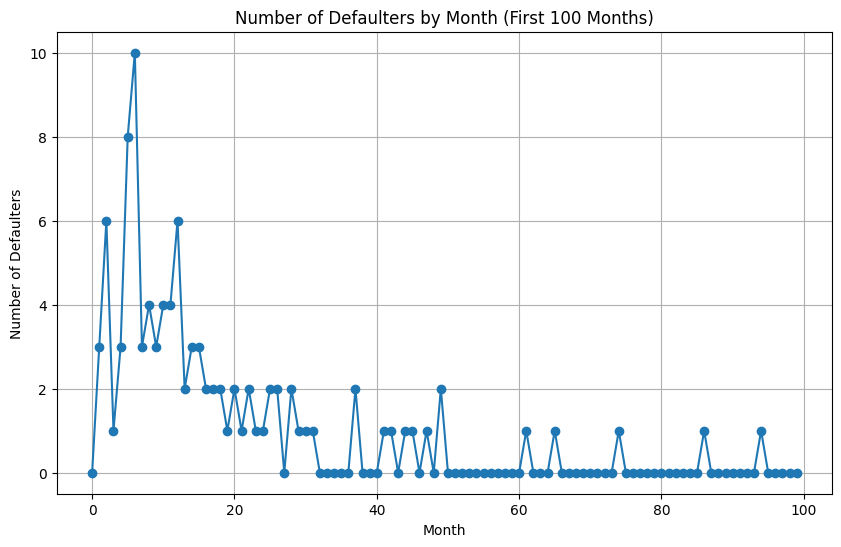

In [46]:
# prompt: visualize month(upto 100 months) vs numbe of defaulters

import matplotlib.pyplot as plt

# Extract data for the first 100 months
months = list(defaults_by_month.keys())[:100]
defaults = list(defaults_by_month.values())[:100]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(months, defaults, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaulters by Month (First 100 Months)")
plt.grid(True)
plt.show()
